Regresión Logistica multinomial


In [65]:
pip install mlxtend 

Note: you may need to restart the kernel to use updated packages.


In [66]:
from sklearn.datasets import load_iris

# cargamos el dataset
iris = load_iris()

# Imprimimos especies y características
print(iris.target_names)
print(iris.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [67]:
# Creamos dataframe para los datos
import pandas as pd
data=pd.DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target
})
data.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [68]:
# Dividimos los datos en variables independientes X, y variable dependiente y (especies)
X = data.drop(["species"],axis = 1)
y = data.species
     

In [69]:
# Dividimos los datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
     

In [70]:
# Definimos la configuración del clasificador
from sklearn.linear_model import LogisticRegression
logisticRegrIris = LogisticRegression(max_iter=1000)

entrenamiento

In [71]:
logisticRegrIris.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

Predicción

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.93      1.00      0.96        13
           2       1.00      0.92      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



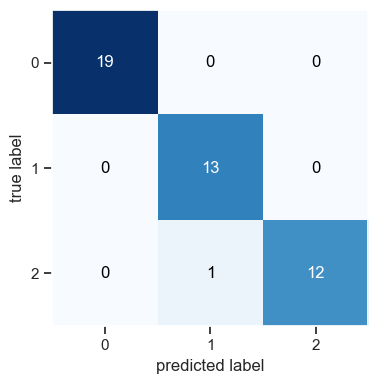

In [72]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
ypred = logisticRegrIris.predict(X_test)
matriz = confusion_matrix(y_test,ypred)

plot_confusion_matrix(conf_mat=matriz, figsize=(4,4), show_normed=False)
plt.tight_layout()
print(classification_report(y_test, ypred))

KNN

In [73]:
import pandas as pd
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt

# Importamos los datos y creamos un data frame
iris = datasets.load_iris()
X =iris.data[:, :2] 
y =iris.target
iris = sns.load_dataset("iris")

df=pd.DataFrame(iris)

In [74]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [75]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [76]:
print("Distribución de las especies de Iris")
df.groupby("species").size()

Distribución de las especies de Iris


species
setosa        50
versicolor    50
virginica     50
dtype: int64

                            Visualización de los datos

La gráfica a construir será del tipo dispersión, y vamos a graficar primero los datos correspondientes al sépalo. Colocamos en el eje X los datos de longitud y en el eje Y los datos del ancho, a su vez para cada una de las especies de Iris le colocamos un color. Para los datos del Iris setosa los colocamos de color azul, para el Iris Versicolor será de color verde y para el Iris Virginica colocamos los datos de color rojo

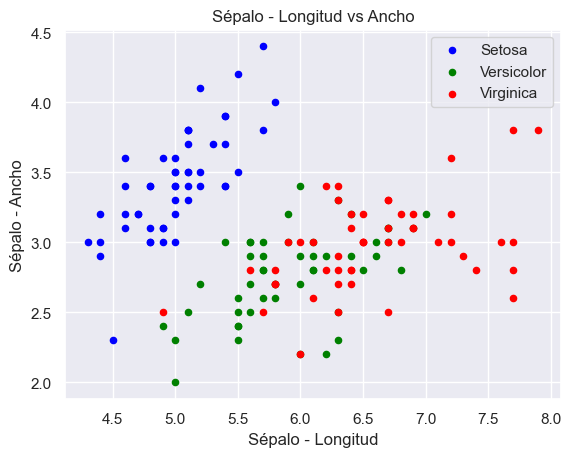

In [77]:
#Grafico Sepal - Longitud vs Ancho
fig = iris[iris.species == 'setosa'].plot(kind='scatter', x='sepal_length', y='sepal_width', color='blue', label='Setosa')
iris[iris.species == 'versicolor'].plot(kind='scatter', x='sepal_length', y='sepal_width', color='green', label='Versicolor', ax=fig)
iris[iris.species == 'virginica'].plot(kind='scatter', x='sepal_length', y='sepal_width', color='red', label='Virginica', ax=fig)

fig.set_xlabel('Sépalo - Longitud')
fig.set_ylabel('Sépalo - Ancho')
fig.set_title('Sépalo - Longitud vs Ancho')
plt.show()

En la gráfica de dispersión los datoa estas distribuidos casi de manera uniforma, en general a los correspondientes largos y anchos del sépalo de Iris setosa, mientras que para Iris versicolor y virginica estan tienen cualidades similares que a simple vista se pueden confundir.

Hacemos exactamente los mismo pero para los datos de largo y ancho del pétalo

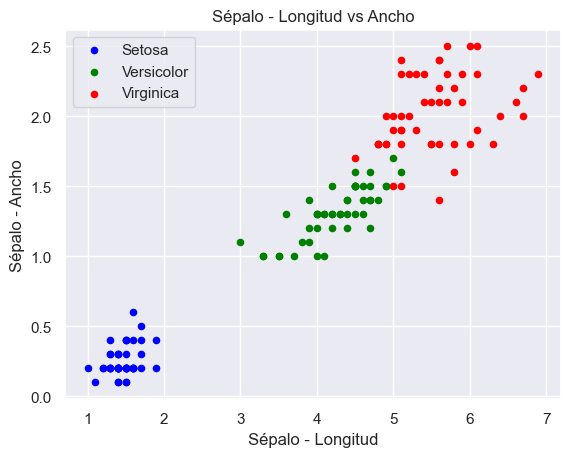

In [78]:
#Grafico Sepal - Longitud vs Ancho
fig = iris[iris.species == 'setosa'].plot(kind='scatter', x='petal_length', y='petal_width', color='blue', label='Setosa')
iris[iris.species == 'versicolor'].plot(kind='scatter', x='petal_length', y='petal_width', color='green', label='Versicolor', ax=fig)
iris[iris.species == 'virginica'].plot(kind='scatter', x='petal_length', y='petal_width', color='red', label='Virginica', ax=fig)

fig.set_xlabel('Sépalo - Longitud')
fig.set_ylabel('Sépalo - Ancho')
fig.set_title('Sépalo - Longitud vs Ancho')
plt.show()

En este gráfico si podemos lograr ver unos datos más uniformes por cada tipo de Iris.

In [79]:

#Eliminamos la columna de species "tipo de Iris" ya que no es relevante para el modelo
df=df.drop("species", axis=1)

In [80]:
# Vamos a crear los bins de datos para transformar nuestros valores continuos en categorías:
df["sepal_widthCat"] = pd.qcut(df["sepal_width"], 3, retbins=False, labels=[1, 2, 3])
df["sepal_widthCat"]


0      3
1      2
2      2
3      2
4      3
      ..
145    2
146    1
147    2
148    3
149    2
Name: sepal_widthCat, Length: 150, dtype: category
Categories (3, int64): [1 < 2 < 3]

Utilizaremos de nuevo el valor estándar de Scikit-Learn de 75% de datos de entrenamiento y 25% de datos de prueba. Esto significa que tendremos el mismo número de registros de entrenamiento y de prueba que en la regresión anterior.

In [81]:
from sklearn.model_selection import train_test_split

SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=SEED)
print('Son {} datos para entrenamiento y {} datos para prueba'.format(X_train.shape[0], X_test.shape[0]))

Son 112 datos para entrenamiento y 38 datos para prueba


Dado que estamos tratando con el mismo conjunto de datos sin procesar y sus diferentes unidades de medida, realizaremos de nuevo el escalado de características.

In [82]:
# Escalado de características para la clasificación
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Después de agrupar, dividir y escalar los datos, podemos aplicarles un clasificador. Para la predicción, utilizaremos de nuevo 5 vecinos como línea de base. También puede instanciar la clase KNeighbors_ sin ningún argumento y automáticamente utilizará 5 vecinos. Aquí, en lugar de importar el KNeighborsRegressor, importaremos el KNeighborsClassifier, clase

In [83]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [84]:
# Tras ajustar el KNeighborsClassifier, podemos predecir las clases de los datos de prueba:
y_pred = classifier.predict(X_test)

In [85]:
acc =  classifier.score(X_test, y_test)
print(acc) 

0.7894736842105263


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.64      0.64      0.64        11
           2       0.67      0.67      0.67        12

    accuracy                           0.79        38
   macro avg       0.77      0.77      0.77        38
weighted avg       0.79      0.79      0.79        38



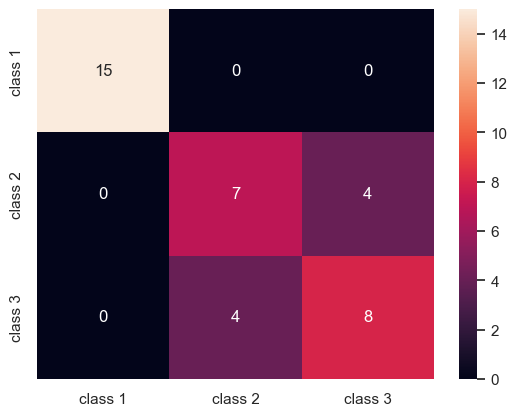

In [86]:
from sklearn.metrics import classification_report, confusion_matrix

# Adding classes names for better interpretation
classes_names = ['class 1','class 2','class 3']
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), 
                  columns=classes_names, index = classes_names)
                  
# Seaborn's heatmap to better visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='d');

print(classification_report(y_test, y_pred))